# Importing Libraries


In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [2]:
df = pd.read_csv("data.csv")

# Drop Unused columns

In [31]:
df.columns

Index(['userid', 'age', 'gender', 'tenure', 'friend_count',
       'friendships_initiated', 'likes_received'],
      dtype='object')

In [23]:
df.drop(['likes', 'mobile_likes','mobile_likes_received', 'www_likes', 'www_likes_received'], axis=1, inplace = True)

# Data Information

In [24]:
df.shape

(98826, 7)

In [25]:
df.head()

,userid,age,gender,tenure,friend_count,friendships_initiated,likes_received
0,2094382,14,male,266.0,0,0,0
1,1192601,14,female,6.0,0,0,0
2,2083884,14,male,13.0,0,0,0
3,1203168,14,female,93.0,0,0,0
4,1733186,14,male,82.0,0,0,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98826 entries, 0 to 99002
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 98826 non-null  int64  
 1   age                    98826 non-null  int64  
 2   gender                 98826 non-null  object 
 3   tenure                 98826 non-null  float64
 4   friend_count           98826 non-null  int64  
 5   friendships_initiated  98826 non-null  int64  
 6   likes_received         98826 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 8.0+ MB


# Datatype converting

In [33]:
numerical_list = ['age', 'tenure', 'friend_count',
       'friendships_initiated', 'likes_received']

In [44]:
def type_convertor():
    for i in range(len(numerical_list)):
        df[numerical_list[i]] = df[numerical_list[i]].astype(float)
type_convertor()        

# Drop Null Values

In [45]:
df.isnull().sum()

userid                   0
age                      0
gender                   0
tenure                   0
friend_count             0
friendships_initiated    0
likes_received           0
dtype: int64

In [30]:
df.dropna(inplace = True)

# Descriptive Analysis

In [27]:
df.describe()

,userid,age,tenure,friend_count,friendships_initiated,likes_received
count,9.882600e+04,98826.000000,98826.000000,98826.000000,98826.000000,98826.000000
mean,1.597069e+06,37.212646,535.649758,196.374031,107.480056,142.665432
std,3.440114e+05,22.524220,454.258423,387.463475,188.861581,1388.990063
min,1.000008e+06,13.000000,0.000000,0.000000,0.000000,0.000000
25%,1.298868e+06,20.000000,226.000000,31.000000,17.000000,1.000000
50%,1.596225e+06,28.000000,412.000000,82.000000,46.000000,8.000000
75%,1.895572e+06,50.000000,673.000000,206.000000,117.000000,59.000000
max,2.193542e+06,113.000000,3139.000000,4923.000000,4144.000000,261197.000000


In [28]:
df.describe(include = 'object')

,gender
count,98826
unique,2
top,male
freq,58574


# Person Correlation

In [51]:
person_corr = df[['age','tenure', 'friend_count','friendships_initiated', 'likes_received']].corr()
person_corr

,age,tenure,friend_count,friendships_initiated,likes_received
age,1.000000,0.458675,-0.027754,-0.058432,-0.022612
tenure,0.458675,1.000000,0.167604,0.134824,0.027865
friend_count,-0.027754,0.167604,1.000000,0.825753,0.236476
friendships_initiated,-0.058432,0.134824,0.825753,1.000000,0.175118
likes_received,-0.022612,0.027865,0.236476,0.175118,1.000000


'friend_count' and 'friendships_initiated' has a strong co-relation. Positive relationship between 'age' and 'tenure', they go up in the same direction.

# EDA

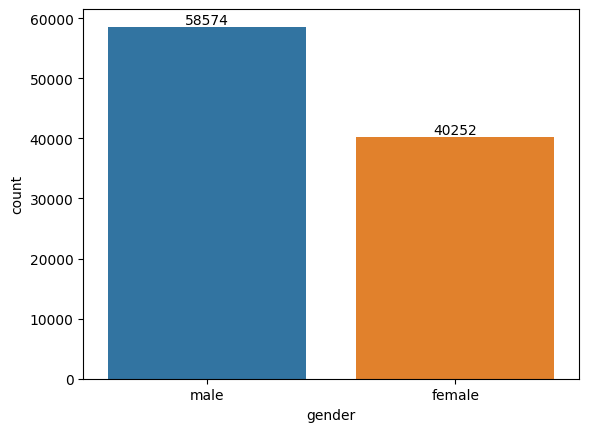

In [48]:
ax = sns.countplot(data = df, x = "gender")
for i in ax.containers:
    ax.bar_label(i)
plt.show()



There are more "male" account on facebook as compare to female.

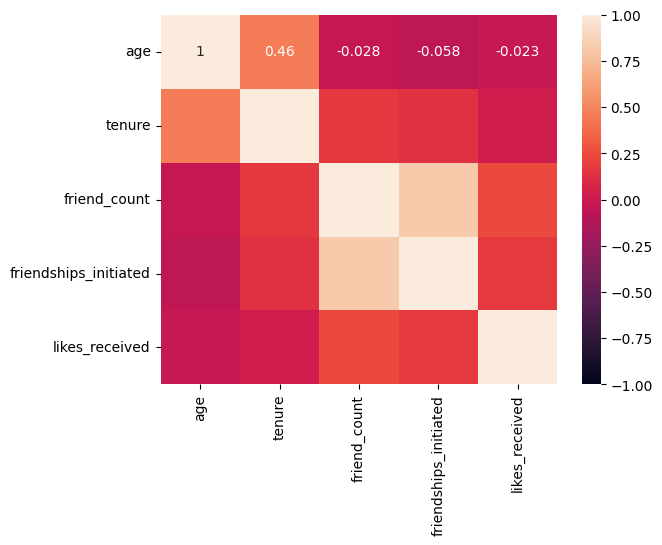

In [59]:
sns.heatmap(person_corr, annot = True,vmin = -1, vmax=1)
plt.show()

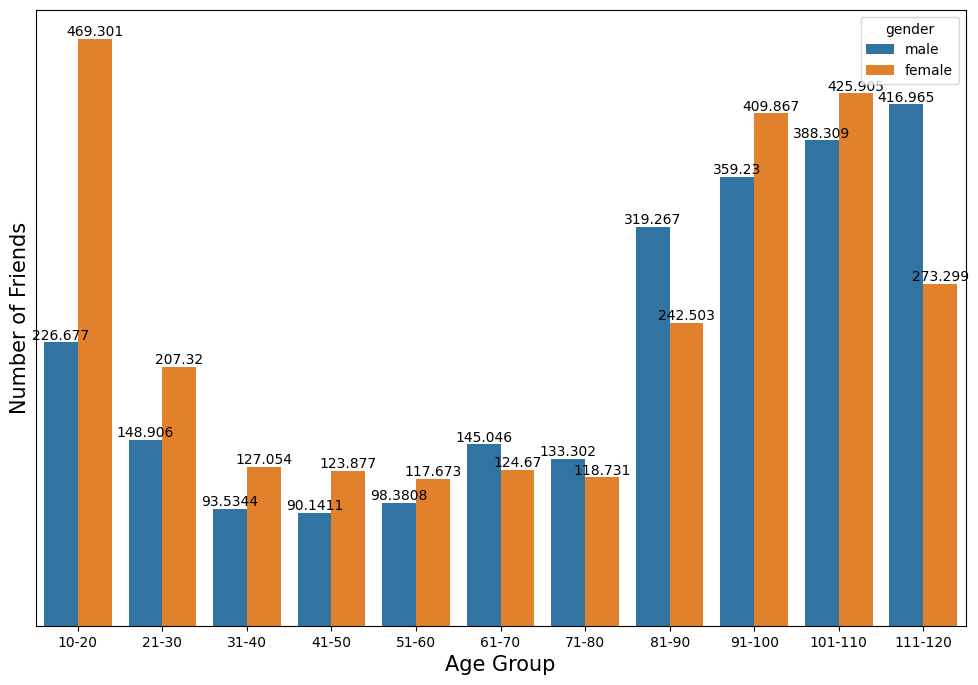

In [89]:
fig,ax = plt.subplots(figsize  = (12,8))
labels = ['10-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100','101-110','111-120']
df['age_group'] = pd.cut(df['age'], bins= np.arange(10,121,10), labels = labels)
sns.barplot(x=df['age_group'], y = df['friend_count'], hue = df['gender'],ax = ax,errorbar=None)
plt.xlabel("Age Group",fontsize = 15)
plt.ylabel("Number of Friends", fontsize = 15)
plt.yticks([])

for i in ax.containers:
    ax.bar_label(i)

# for spine in ax.spines.values():   # for removing the border
#     spine.set_visible(False)
plt.show()



In [85]:
fc = df['friend_count'] ==0
friend_c = fc.value_counts()
friend_c

friend_count
False    96864
True      1962
Name: count, dtype: int64

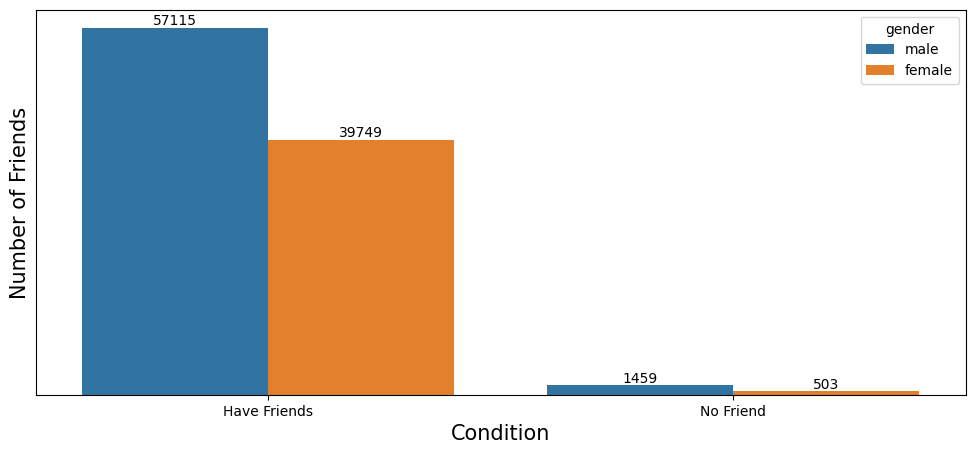

In [88]:
fig,ax = plt.subplots(figsize  = (12,5))

sns.countplot(x=fc,hue = df['gender'], ax = ax)
plt.xlabel("Condition",fontsize = 15)
plt.ylabel("Number of Friends", fontsize = 15)
ax.set_xticklabels(['Have Friends', 'No Friend'])
plt.yticks([])

for i in ax.containers:
    ax.bar_label(i)

plt.show()

There are more "male" who had 'no friend' as compare to females. And also there are more "male" who had more 'friends' as compare to females.

In [91]:
df.sort_values(by='likes_received', ascending = False)[:5]  # Received more likes from other users.

,userid,age,gender,tenure,friend_count,friendships_initiated,likes_received,age_group
94906,1674584,17.0,female,401.0,818.0,395.0,261197.0,10-20
77121,1441676,20.0,female,253.0,230.0,73.0,178166.0,10-20
98822,1715925,23.0,female,705.0,4077.0,793.0,152014.0,21-30
98994,2063006,20.0,female,402.0,1988.0,332.0,106025.0,10-20
98878,1053087,23.0,male,596.0,4320.0,836.0,82623.0,21-30


# Top 5 Users who had more likes per day

In [94]:
# For every single user, likes per day

df['likes_per_day']  = df['likes_received']/df['tenure'].where(df['tenure']>0)
famous = df.sort_values(by = [ 'likes_per_day','likes_received'],ascending = False)[:5]
famous

,userid,age,gender,tenure,friend_count,friendships_initiated,likes_received,age_group,likes_per_day
94996,1149300,24.0,female,2.0,834.0,104.0,5404.0,21-30,2702.000000
94057,2175941,18.0,male,2.0,640.0,299.0,2542.0,10-20,1271.000000
98773,2042824,18.0,male,51.0,4817.0,32.0,52964.0,10-20,1038.509804
77121,1441676,20.0,female,253.0,230.0,73.0,178166.0,10-20,704.213439
94906,1674584,17.0,female,401.0,818.0,395.0,261197.0,10-20,651.364090


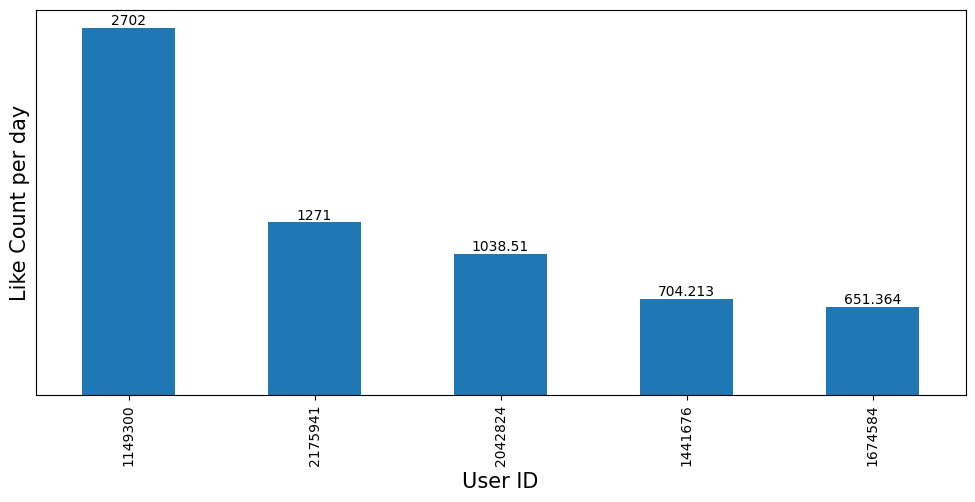

In [101]:
fig,ax = plt.subplots(figsize  = (12,5))
famous.plot(x='userid' ,y='likes_per_day',kind = 'bar', ax = ax)
plt.xlabel("User ID",fontsize = 15)
plt.ylabel("Like Count per day", fontsize = 15)
plt.yticks([])
for i in ax.containers:
    ax.bar_label(i)


#removing legend

ax.get_legend().remove()
plt.show()

# Top 5 Users who send more friendship requests.

In [97]:
followers = df.sort_values(by = 'friendships_initiated',ascending = False)[:5]
followers

,userid,age,gender,tenure,friend_count,friendships_initiated,likes_received,age_group,likes_per_day
98993,1654565,19.0,male,394.0,4538.0,4144.0,15088.0,10-20,38.294416
98842,1052695,22.0,female,874.0,4297.0,3654.0,2006.0,21-30,2.295195
98675,1949247,19.0,female,434.0,4189.0,3594.0,2859.0,10-20,6.587558
98567,1205425,60.0,female,1562.0,4794.0,3538.0,1318.0,51-60,0.843790
98347,1403953,19.0,male,519.0,3693.0,3415.0,20.0,10-20,0.038536


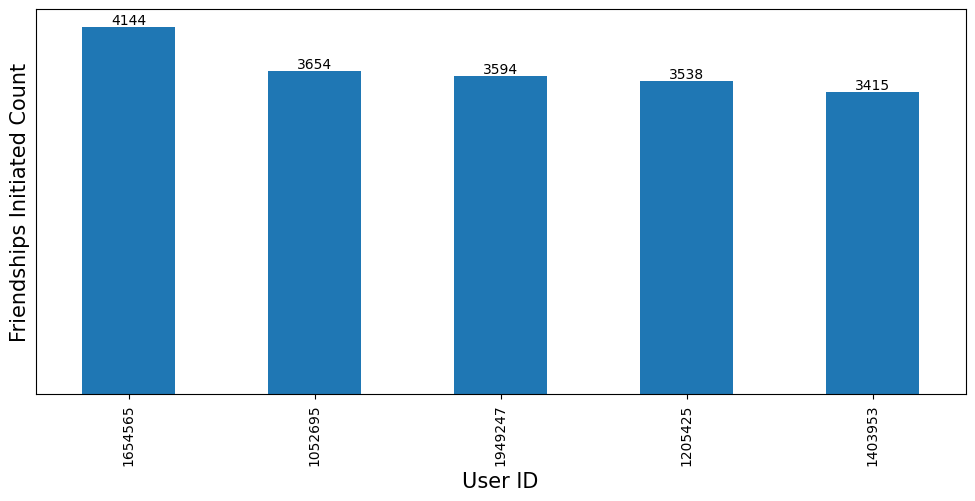

In [99]:
fig,ax = plt.subplots(figsize  = (12,5))
followers.plot(x='userid' ,y='friendships_initiated',kind = 'bar', ax = ax)
plt.xlabel("User ID",fontsize = 15)
plt.ylabel("Friendships Initiated Count", fontsize = 15)
plt.yticks([])
for i in ax.containers:
    ax.bar_label(i)


#removing legend

ax.get_legend().remove()
plt.show()